In [1]:
import numpy as np
import math
import tables
import h5py
import tables
import glob
import h5py
import pandas as pd
import yaml
import matplotlib.pyplot as plt
from matplotlib import colors as clrs
import matplotlib as mpl
import simweights
%matplotlib inline
from scipy.interpolate import griddata


E_nu_bins =np.concatenate((np.logspace(1,2,1),np.logspace(2,6,8+1)))
E_nu_bin_centers= np.sqrt(E_nu_bins[:-1] * E_nu_bins[1:])

#E_mu_bins: "np.logspace(1,7,12+1)"
E_mu_bins= ((np.logspace(1,6,8+1)))
E_mu_bin_centers= np.sqrt(E_mu_bins[:-1] * E_mu_bins[1:])

gridpts_mu= ((np.logspace(1,6,8+1)))
gridpts_nu= np.concatenate((np.logspace(1,2,1),np.logspace(2,6,8+1)))
gridpts_mu_centers = np.sqrt(gridpts_mu[:-1] * gridpts_mu[1:])
gridpts_nu_centers = np.sqrt(gridpts_nu[:-1] * gridpts_nu[1:])
nu_ticks = np.logspace(1,6,6)

mult_bins = np.linspace(0,5,5+1)
mult_bin_centers = (mult_bins[:-1] + mult_bins[1:])/2

xv, yv=np.meshgrid((E_nu_bin_centers),(E_mu_bin_centers))
plotx,ploty=np.meshgrid((gridpts_nu),(gridpts_mu))

In [2]:
def one_dimensional_normalization(spline):
    spline = np.round(spline, decimals=8)
    threshold = 1e-8

    spline[spline < threshold] = 0
    dims_nu = spline.shape[0]
    dims_mu = spline.shape[1]
    norm_hist = np.empty((dims_nu,dims_mu))
    for index in range(dims_nu):
        piece = spline[index,:]
        norm_piece = piece /np.sum(piece)
        norm_piece =np.nan_to_num(norm_piece)
        norm_hist[index,:]=norm_piece

    return norm_hist

In [66]:
mult =np.load('/data/user/zrechav/output_SelfVeto_Correlation_Tables/multiplicity_mapping/NuMu_Mult_Zen_0.2_Depth_2.0.npy')
mult_norm = one_dimensional_normalization(mult)

/tmp/ipykernel_18238/468339615.py:11: RuntimeWarning: invalid value encountered in divide
  norm_piece = piece /np.sum(piece)


[0.5 1.5 2.5 3.5 4.5]
[0. 1. 2. 3. 4. 5.]


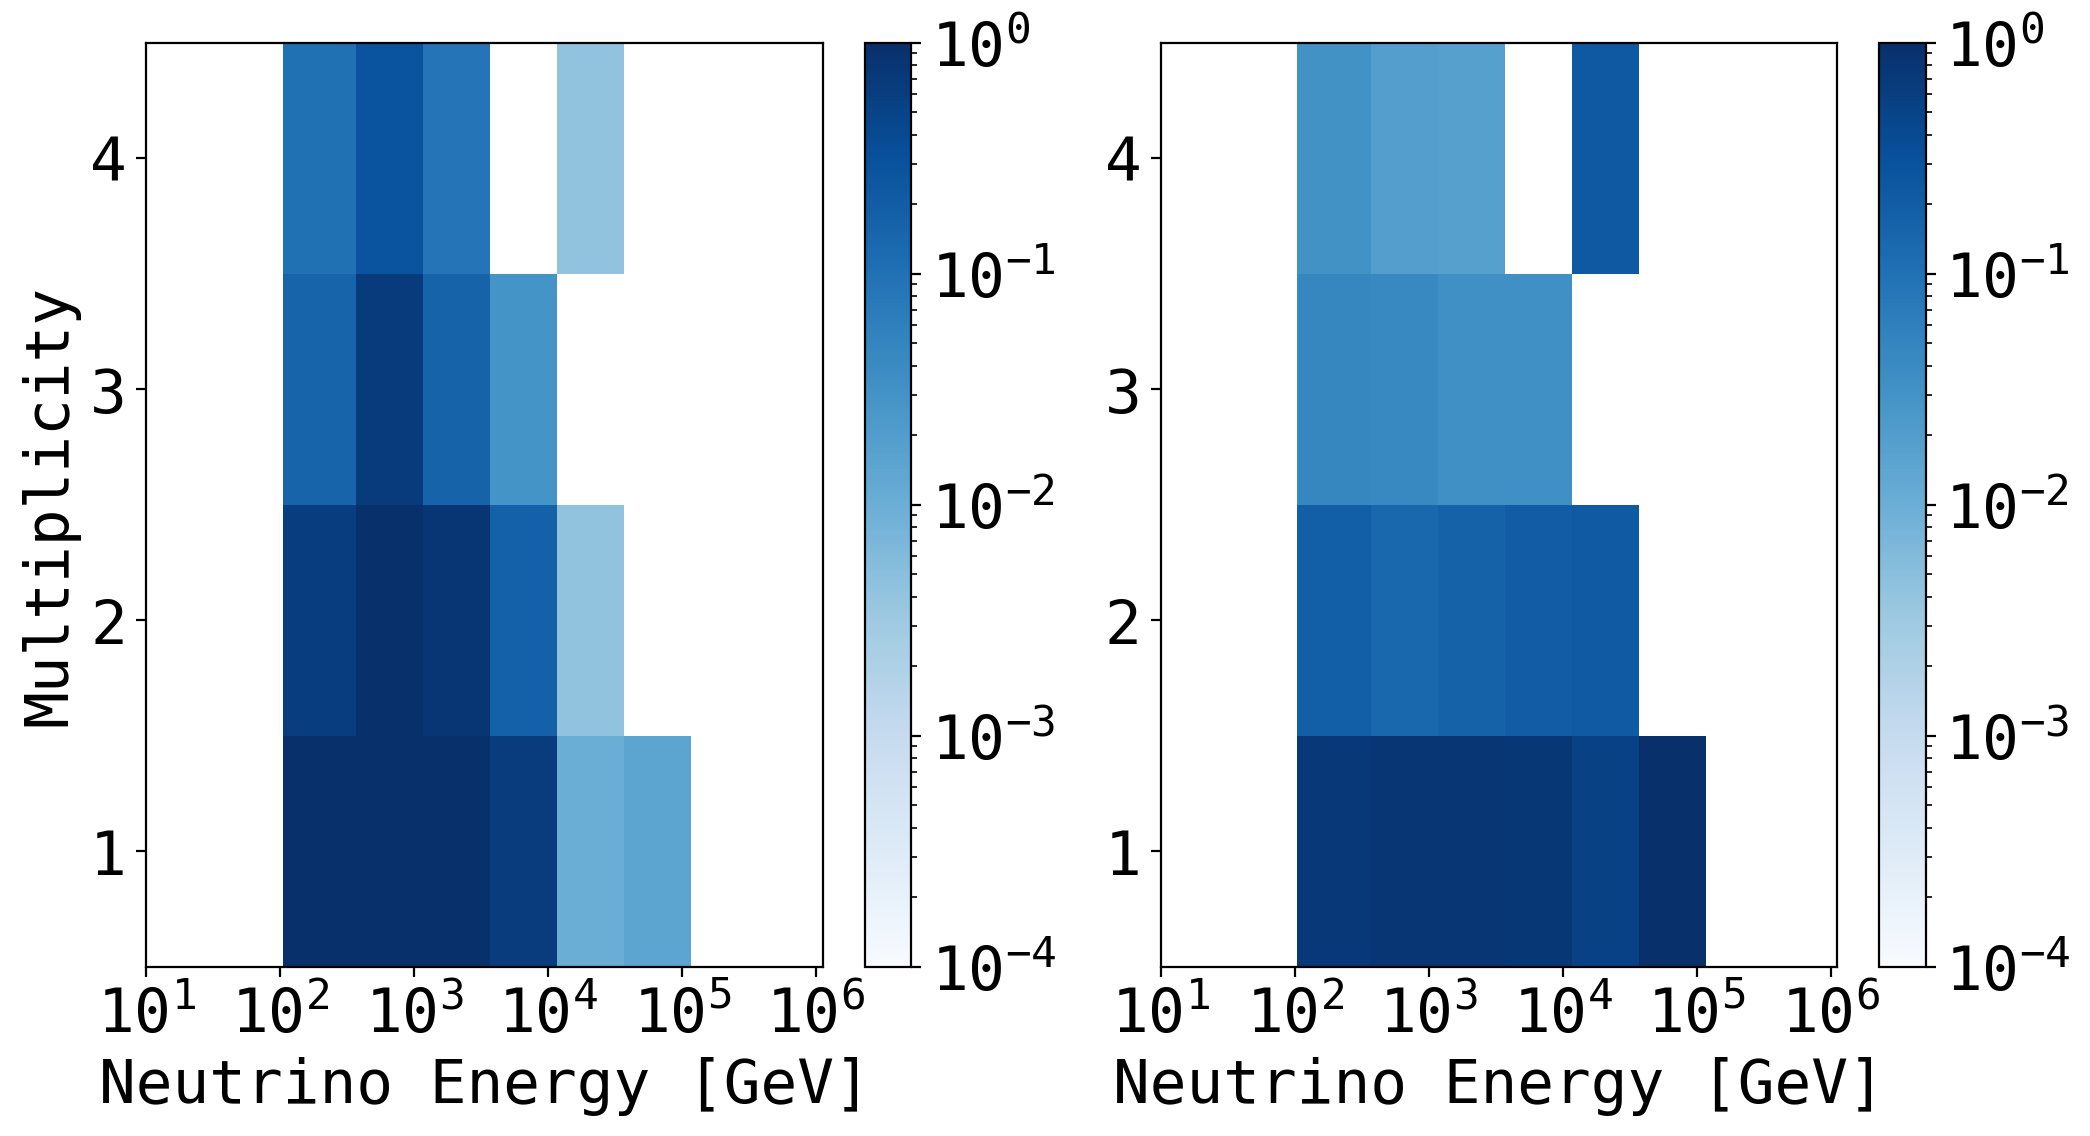

In [69]:
mpl.rcParams["font.family"] = 'monospace'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
f, ax = plt.subplots(ncols=2, figsize=(12, 6), dpi=200)
midpoints = (mult_bins[:-1] + mult_bins[1:]) / 2


print(mult_bin_centers)
print(mult_bins)
c = ax[0].pcolormesh( E_nu_bin_centers, mult_bin_centers, mult.T, cmap='Blues', norm=clrs.LogNorm(vmin=10**-4, vmax=1))
ax[0].set_xlabel('Neutrino Energy [GeV]')
ax[0].set_ylabel('Multiplicity')
ax[0].set_xscale('log')
#ax.set_yscale('log')
ax[0].set_xticks(nu_ticks)
ax[0].set_yticks(midpoints)
ax[0].set_yticklabels(['0','1','2','3','4'])
ax[0].set_ylim(1,5)

c1 = ax[1].pcolormesh( E_nu_bin_centers, mult_bin_centers, mult_norm.T, cmap='Blues', norm=clrs.LogNorm(vmin=10**-4, vmax=1))
ax[1].set_xlabel('Neutrino Energy [GeV]')
#ax[1].set_ylabel('Multiplicity')
ax[1].set_xscale('log')
#ax.set_yscale('log')
ax[1].set_xticks(nu_ticks)
ax[1].set_yticks(midpoints)
ax[1].set_yticklabels(['0','1','2','3','4'])
ax[1].set_ylim(1,5)

plt.colorbar(c, ax=ax[0])
plt.colorbar(c1, ax=ax[1])

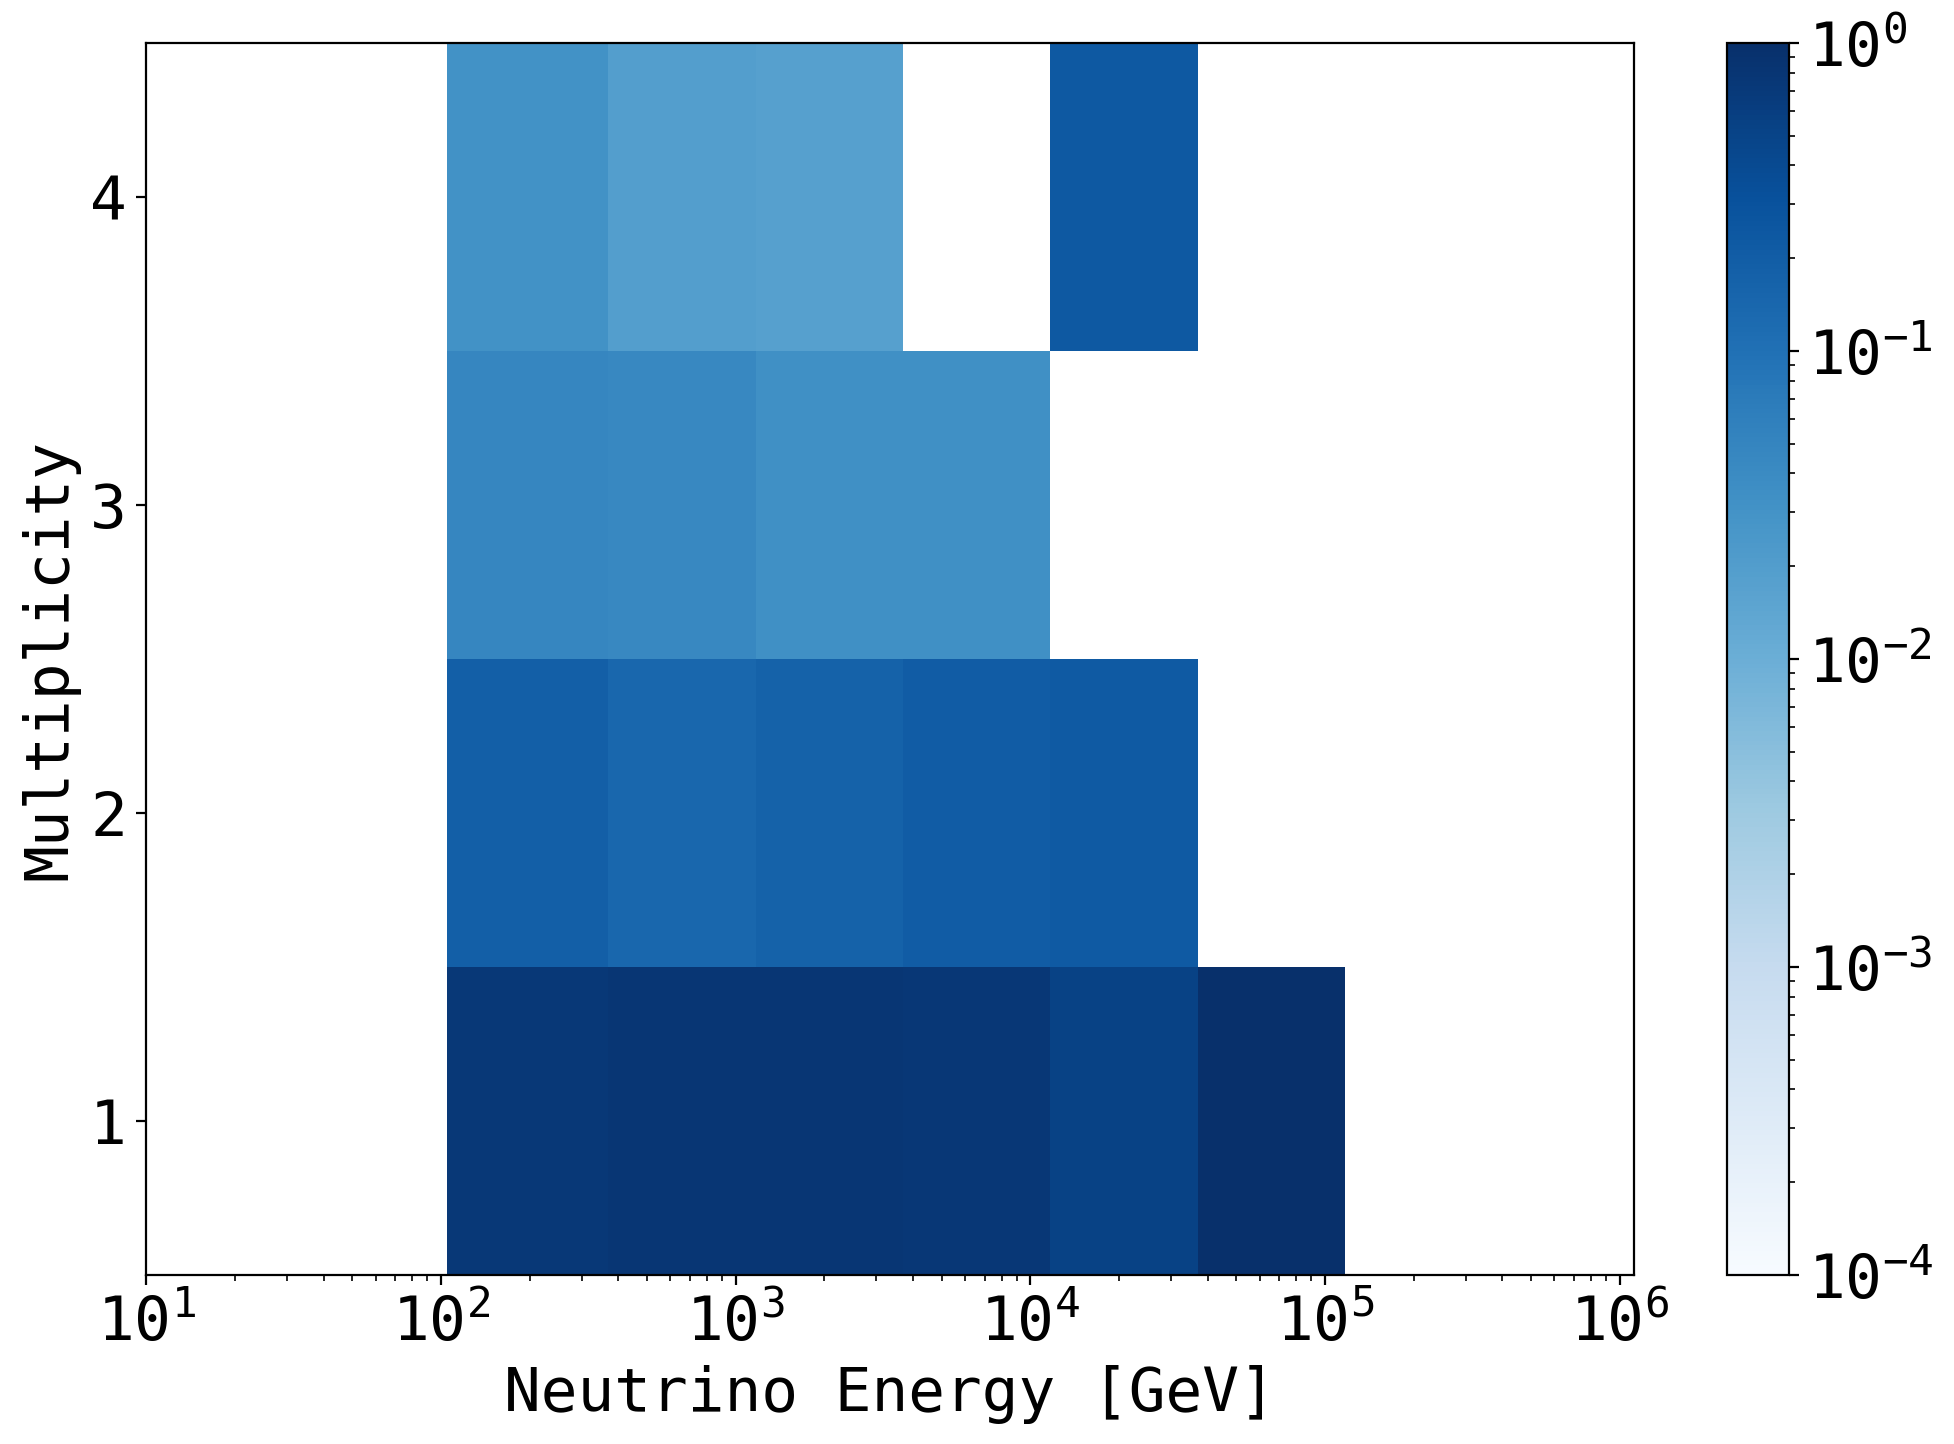

In [72]:
mpl.rcParams["font.family"] = 'monospace'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
f, ax = plt.subplots(ncols=1, figsize=(12, 8), dpi=200)
midpoints = (mult_bins[:-1] + mult_bins[1:]) / 2

c1 = ax.pcolormesh( E_nu_bin_centers, mult_bin_centers, mult_norm.T, cmap='Blues', norm=clrs.LogNorm(vmin=10**-4, vmax=1))
ax.set_xlabel('Neutrino Energy [GeV]')
ax.set_ylabel('Multiplicity')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xticks(nu_ticks)
ax.set_yticks(midpoints)
ax.set_yticklabels(['0','1','2','3','4'])
ax.set_ylim(1,5)

#plt.colorbar(c, ax=ax[0])
plt.colorbar(c1, ax=ax)

/tmp/ipykernel_18238/468339615.py:11: RuntimeWarning: invalid value encountered in divide
  norm_piece = piece /np.sum(piece)


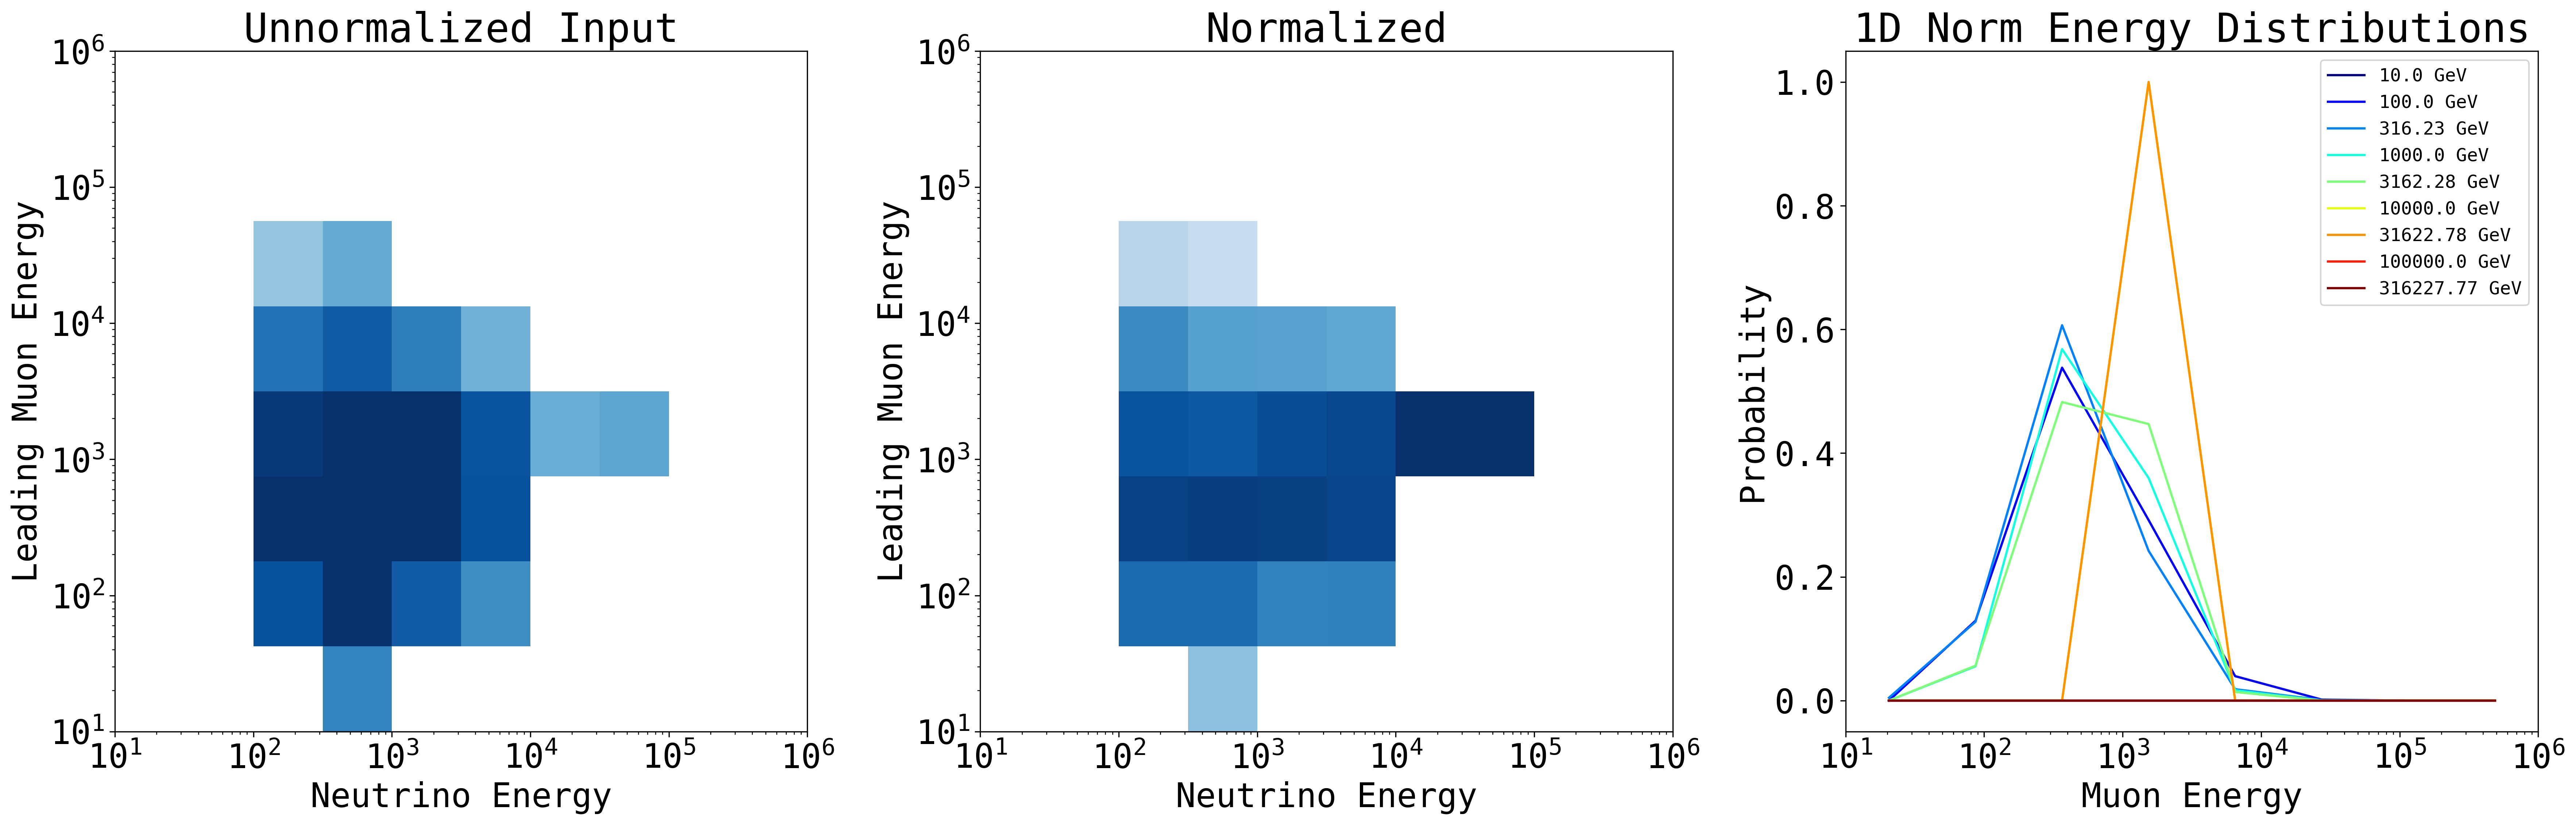

In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

mpl.rcParams["font.family"] = 'monospace'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['font.size'] = 22

# Assuming you have some data for ONE_D, gridpts, and nu_ticks
# Replace this with your actual data

# Creating subplots
files = sorted(glob.glob('/data/user/zrechav/output_SelfVeto_Correlation_Tables/histograming/1D/NuMu_Single_Zen_0.2_Depth_2.0.npy'))
for file in files:
    ONE_D = np.load(file)
    norm_hist = one_dimensional_normalization(ONE_D)
    f, axs = plt.subplots(ncols=3, figsize=(24, 8), dpi=300)
    ax = axs[0]
    #ax = axs[0]
    ax1 = axs[1]
    ax2 = axs[2]


    # Plotting on the first subplot (axs[0])
    pcm =ax.pcolormesh(E_nu_bins, E_mu_bins, ONE_D.T, cmap='Blues', norm=clrs.LogNorm(vmin=10**-4, vmax=1))
    ax.set_xlabel('Neutrino Energy')
    ax.set_ylabel('Leading Muon Energy')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks(nu_ticks)
    ax.set_yticks(nu_ticks)
    ax.set_title('Unnormalized Input')  # Add a title if needed


    # Plotting on the second subplot (axs[1])
    ax1.pcolormesh(E_nu_bins, E_mu_bins, norm_hist.T, cmap='Blues', norm=clrs.LogNorm(vmin=10**-4, vmax=1))
    ax1.set_xlabel('Neutrino Energy')
    ax1.set_ylabel('Leading Muon Energy')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xticks(nu_ticks)
    ax1.set_yticks(nu_ticks)
    ax1.set_xlim(10,10**6)
    ax1.set_ylim(10,10**6)
    ax1.set_title('Normalized') 

    # Plotting 1D distributions on the third subplot (axs[2])
    for i in range(norm_hist.shape[0]):
        color = plt.cm.jet(i / (norm_hist.shape[0] - 1))  # Use 'Blues' colormap
        ax2.plot(E_mu_bin_centers, norm_hist[i], label=f'{np.round(E_nu_bins[i],2)} GeV', color=color)
    ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.set_xlabel('Muon Energy')
    ax2.set_ylabel('Probability')
    ax2.set_xticks(nu_ticks)
    ax2.legend(fontsize=12)
    ax2.set_title('1D Norm Energy Distributions')



    plt.tight_layout()

    plt.show()